In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


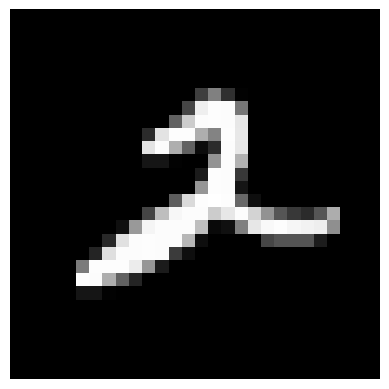

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow.keras
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.layers import  Dense , Dropout , Conv2D , MaxPool2D , Flatten , Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA/digit/train.csv')
y = X.pop('label')
test0 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA/digit/test.csv')

img = X.iloc[567]
img = np.array(img)
img = img.reshape((28,28))
plt.imshow(img , cmap = 'gray')
plt.axis('off')
plt.show

def norm(x):
    x = x / 255.0
    return x
def reshape(x):
    x = x.values.reshape(-1,28,28,1)
    return x


X = norm(X)
test0 = norm(test0)
X = reshape(X)
test = reshape(test0)


y = to_categorical(y , num_classes = 10)
y.shape

trainx , valx , trainy , valy = train_test_split(X , y , random_state = 42)




In [ ]:
print(X[0,:])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
model = tf.keras.Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(filters = 4 ,
                 kernel_size = (5,5),
                 padding = 'same' ,
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (3,3)))
model.add(Conv2D(filters = 8,
                 kernel_size = (3,3),
                 padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (3,3) , strides  = (2,2)))
model.add(Flatten())
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

datagen = ImageDataGenerator()
datagen.fit(trainx)

product = model.fit(datagen.flow(trainx , trainy , batch_size = 300),
                             epochs = 20 , validation_data = (valx , valy))

Epoch 1/20
105/105 [==============================] - 17s 157ms/step - loss: 1.1006 - accuracy: 0.6904 - val_loss: 0.5837 - val_accuracy: 0.8247
Epoch 2/20
105/105 [==============================] - 15s 146ms/step - loss: 0.4036 - accuracy: 0.8777 - val_loss: 0.3072 - val_accuracy: 0.9077
Epoch 3/20
105/105 [==============================] - 18s 169ms/step - loss: 0.2629 - accuracy: 0.9177 - val_loss: 0.2158 - val_accuracy: 0.9352
Epoch 4/20
105/105 [==============================] - 15s 144ms/step - loss: 0.1994 - accuracy: 0.9382 - val_loss: 0.1865 - val_accuracy: 0.9402
Epoch 5/20
105/105 [==============================] - 15s 144ms/step - loss: 0.1632 - accuracy: 0.9489 - val_loss: 0.1401 - val_accuracy: 0.9564
Epoch 6/20
105/105 [==============================] - 15s 145ms/step - loss: 0.1396 - accuracy: 0.9568 - val_loss: 0.1211 - val_accuracy: 0.9639
Epoch 7/20
105/105 [==============================] - 16s 151ms/step - loss: 0.1236 - accuracy: 0.9622 - val_loss: 0.1136 - val_ac

<Axes: >

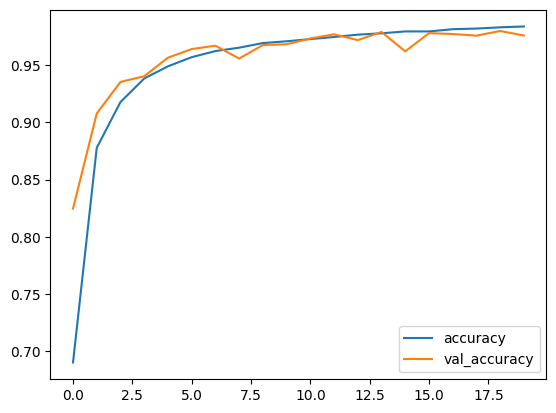

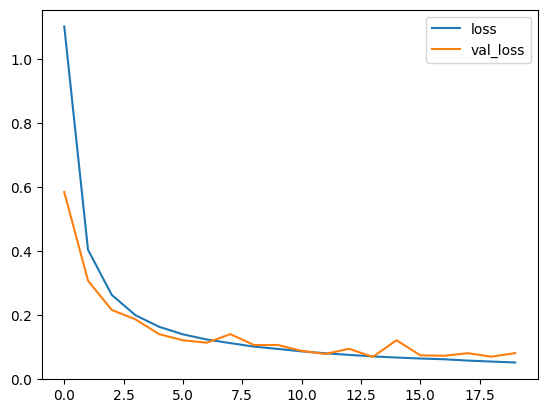

In [ ]:
history = pd.DataFrame(product.history)
history.loc[:,['accuracy','val_accuracy']].plot()
history.loc[:,['loss','val_loss']].plot()

In [ ]:
model.evaluate(valx,valy)

329/329 [==============================] - 2s 6ms/step - loss: 0.0810 - accuracy: 0.9757


[0.08101186156272888, 0.9757142663002014]

In [ ]:
model.save('digit_clf.keras')

In [ ]:
output = pd.DataFrame({'ImageId':range(1,len(test)+1),'Label':predictions.argmax(axis=1)})